#Rudimentry stock market analysis

##Exploratory analysis in the time domain


###Basic Questions:

1. What was the change in price of a stock overtime?

2. What was the daily return of the stock on average?

3. What was the moving average of the various stocks? 

### Let's go deeper:

4. What was the correlation between different stock closing prices?

5. Can we determine a correlation between different stock daily returns?

6. How much value do we put at risk by investing in a certain stock?

7. Can we predict future stock behavior?



In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division

##Question 1:
What was the change in price of a stock overtime?

In [3]:
tech_list =  ['AAPL','GOOG','MSFT','AMZN']

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [10]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.879802,118.969722,116.649802,117.788175,5.464784e+07,116.737713
std,10.315334,10.125769,10.349501,10.225819,2.303470e+07,10.493422
min,94.870003,97.720001,92.000000,96.260002,1.447960e+07,94.642124
25%,110.180002,111.559999,108.540003,109.515003,3.968435e+07,108.286882
50%,118.680001,119.914997,117.720001,118.930000,4.905490e+07,117.704435
75%,127.142502,127.907497,125.982502,126.912502,6.284242e+07,126.029532
max,134.460007,134.539993,131.399994,133.000000,1.898463e+08,131.942761


In [12]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-09-08,99.300003,99.309998,98.050003,98.360001,46356700,96.706827
2014-09-09,99.080002,103.080002,96.139999,97.989998,189846300,96.343043
2014-09-10,98.010002,101.110001,97.760002,101.000000,100869600,99.302455
2014-09-11,100.410004,101.440002,99.620003,101.430000,62353100,99.725228
2014-09-12,101.209999,102.190002,101.080002,101.660004,62626100,99.951366


##Answer 1:
We can see from the figure below the adjusted closing price of AAPL over the past year

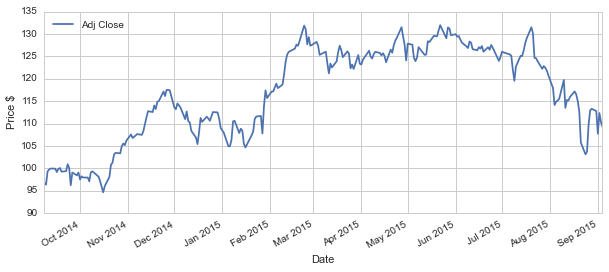

In [17]:
AAPL['Adj Close'].plot(legend=True, figsize = (10,4))
plt.ylabel("Price $")

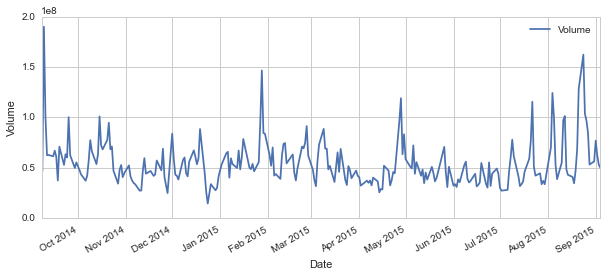

In [18]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))
plt.ylabel("Volume")

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

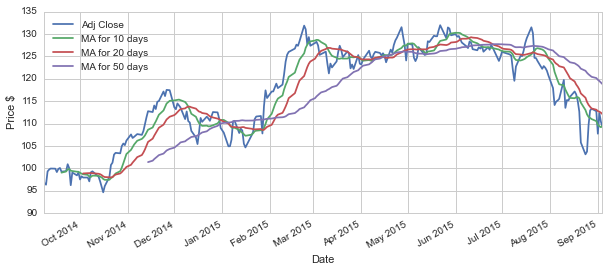

In [21]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))
plt.ylabel("Price $")

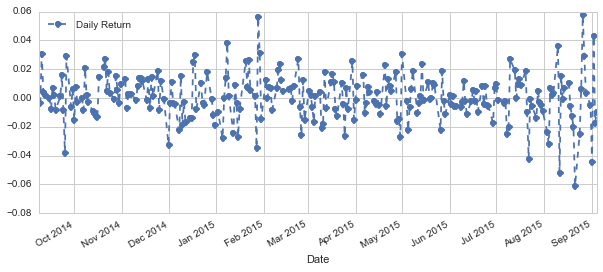

In [22]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

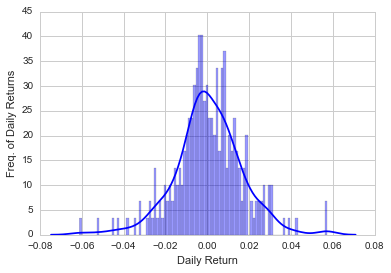

In [26]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100, color='blue')
plt.ylabel("Freq. of Daily Returns")

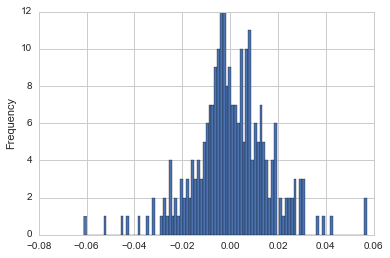

In [28]:
AAPL['Daily Return'].hist(bins=100)
plt.ylabel("Frequency")

In [36]:
closing_df = DataReader(tech_list,'yahoo', start, end)['Adj Close']

In [37]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-08,96.706827,342.339996,589.722659,45.257913
2014-09-09,96.343043,329.750000,581.012615,45.540346
2014-09-10,99.302455,331.329987,583.102636,45.618262
2014-09-11,99.725228,330.519989,581.352598,45.774088
2014-09-12,99.951366,331.190002,575.622589,45.481914


In [38]:
tech_rets = closing_df.pct_change()

In [39]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-08,NaN,NaN,NaN,NaN
2014-09-09,-0.003762,-0.036776,-0.014770,0.006241
2014-09-10,0.030717,0.004791,0.003597,0.001711
2014-09-11,0.004257,-0.002445,-0.003001,0.003416
2014-09-12,0.002268,0.002027,-0.009856,-0.006383


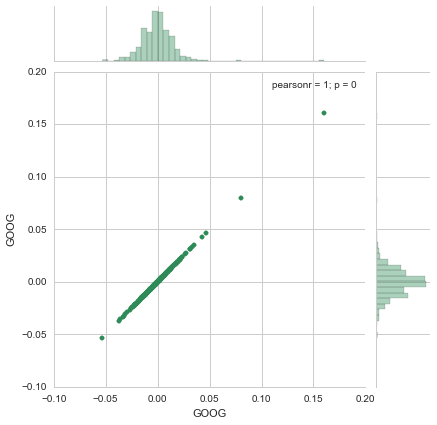

In [42]:
#Linear relationship to itself. Makes sense. 
sns.jointplot('GOOG', 'GOOG', tech_rets, kind = 'scatter', color = 'seagreen')

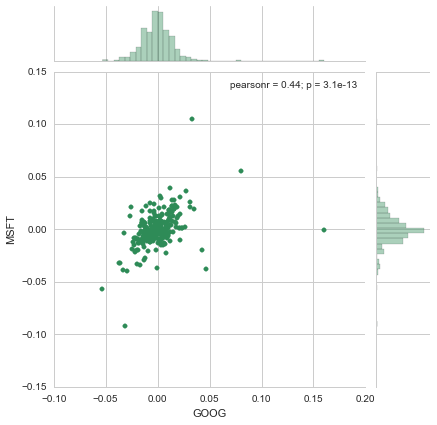

In [43]:
#Look at a relationship between tech stocks

sns.jointplot('GOOG','MSFT', tech_rets, kind = 'scatter', color='seagreen')

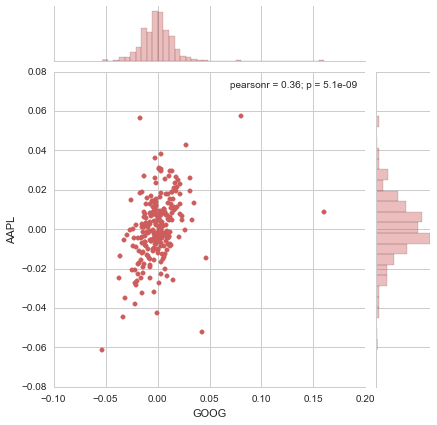

In [49]:
sns.jointplot('GOOG','AAPL', tech_rets, kind = 'scatter', color='Indianred')

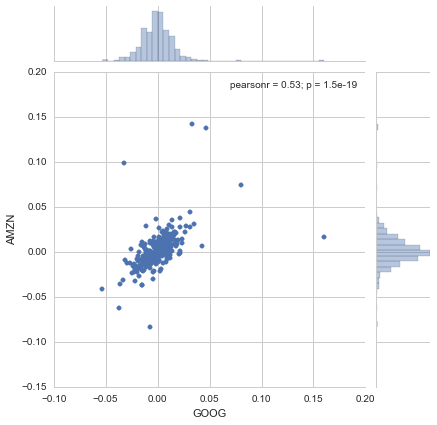

In [52]:

sns.jointplot('GOOG','AMZN', tech_rets, kind = 'scatter')

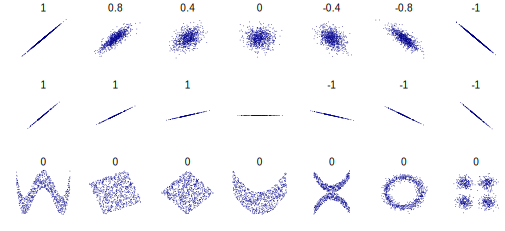

In [45]:

from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [55]:
#Cumbersome to compare data this way so I'm going to use a paired plots.

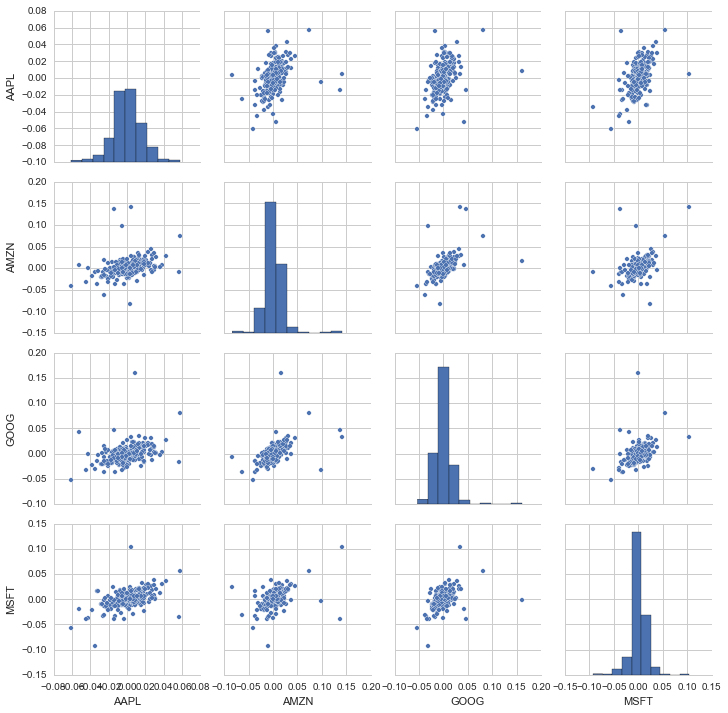

In [57]:
sns.pairplot(tech_rets.dropna())

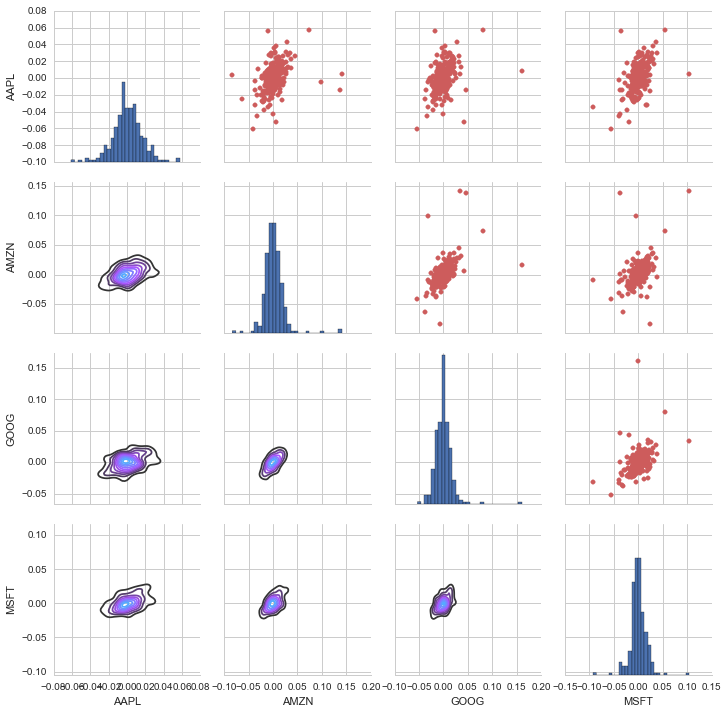

In [59]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='Indianred')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

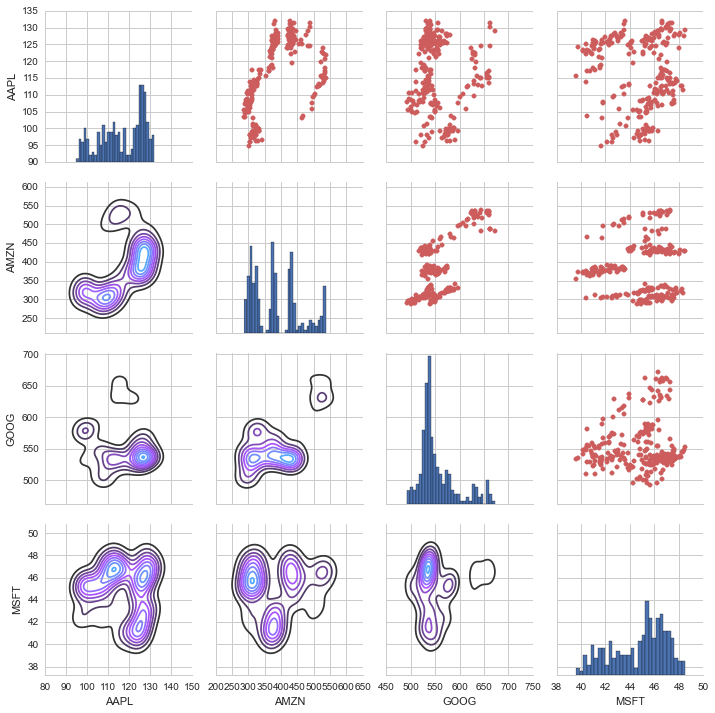

In [60]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='Indianred')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

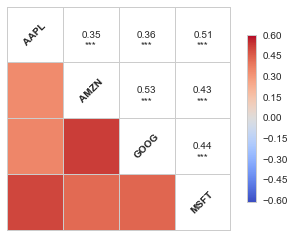

In [65]:
sns.corrplot(tech_rets.dropna(),annot=True)

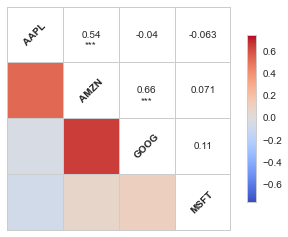

In [66]:
sns.corrplot(closing_df.dropna(),annot=True)

##How are these companies correlated.

I investigated these companies first by seeing if anything jumps out using multiple plots for the adjusted close since it removes and stock splits or other anomalies. Then I checked out heat maps to see the correlations. We can see that with the Adj. Close all the tech stocks are somewhat correlated. It's actually fascinating to find that Amazon and Google are heavily correlated with Adj. Close. Apple and Microsoft are also heavily correlated. I can speculate this might be due to Google and Amazon are more dependent on online sales while Microsoft and Apple specialize more in hardware and OS. Then again Google is heavily in the mobile OS market so that might not necessarily be true. Also Amazon's tangible sales are it's marketplace so it's worth diving into this deeper. 

##Risk Analysis:

In [68]:
rets = tech_rets.dropna()

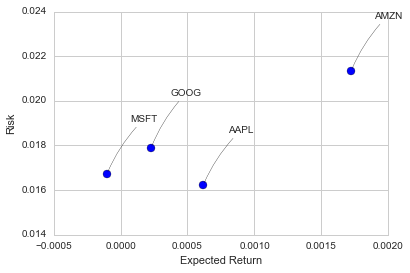

In [95]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(), s = area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")
plt.ylim([0.014, 0.024])
plt.xlim([-0.0005,0.002])

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=0.1'))

## Discussion

If we look at the standard deviation compared to the average price of these stocks over the last year, we can get an estimate of which stocks would give us the best return compared to risk. Remember that the returns are the calculated as the percent change of the closing price. Depending on where your risk tolerance is, Amazon has the best returns but has a slightly higher risk associated with it. The other three are less risky but your returns will be much less. I'm going to come back to compare these over a longer time line to determine which stock is better for long term growth. 

In [97]:
#Back to Apple
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2014-09-09,-0.003762,-0.036776,-0.014770,0.006241
2014-09-10,0.030717,0.004791,0.003597,0.001711
2014-09-11,0.004257,-0.002445,-0.003001,0.003416
2014-09-12,0.002268,0.002027,-0.009856,-0.006383
2014-09-15,-0.000295,-0.022042,-0.004378,-0.009850


In [100]:
#Worst daily return will not exceed -2.5% with 95% confidence
rets['AAPL'].quantile(0.05)

-0.025267665309060883

In [101]:
#Looking at the others
rets['AMZN'].quantile(0.05)

-0.022479042388789339

In [103]:
rets['GOOG'].quantile(0.05)

-0.022208366546887459

In [104]:
rets['MSFT'].quantile(0.05)

-0.022479042388789339

Looks like for the others -2.2% return is the worst you will get 95% of the time. Pairing that with our previous risk analysis would show that Amazon would be a prime candidate to buy if you were feeling risky. If you weren't feeling risky Apple or Google would be the next best. Granted its wise to remember the other 5% of the time... so lets simulate what could happen with Amazon using a Monte Carlo Simulations:

In [106]:
days = 365
dt = 1/days
mu = rets.mean()['AMZN']
sigma = rets.std()['AMZN']

In [107]:
#Monte Carlo
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in xrange(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1]+(price[x-1] * (drift[x] +shock[x]))
        
    return price

In [113]:
AMZN.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-09-08,344.540009,345.809998,339.040009,342.339996,2955300,342.339996
2014-09-09,341.609985,341.760010,329.179993,329.750000,4646800,329.750000
2014-09-10,334.299988,334.980011,328.820007,331.329987,3797400,331.329987
2014-09-11,329.940002,333.010010,326.390015,330.519989,2720200,330.519989
2014-09-12,329.559998,332.890015,328.790009,331.190002,3429300,331.190002


In [114]:
AMZN.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-31,516.440002,519.409973,509.070007,512.890015,2983000,512.890015
2015-09-01,499.140015,510.000000,493.429993,496.540009,3824000,496.540009
2015-09-02,505.089996,510.859985,497.720001,510.549988,3689600,510.549988
2015-09-03,514.500000,515.840027,502.570007,504.720001,3098900,504.720001
2015-09-04,497.649994,502.850006,495.640015,499.000000,2690200,499.000000


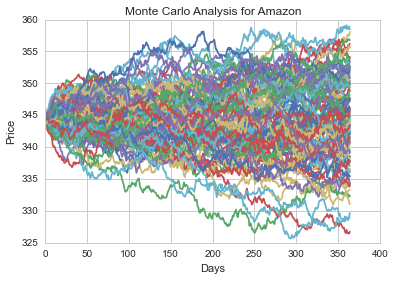

In [110]:
start_price = 344.54

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Amazon')

In [116]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [117]:
q = np.percentile(simulations,1)

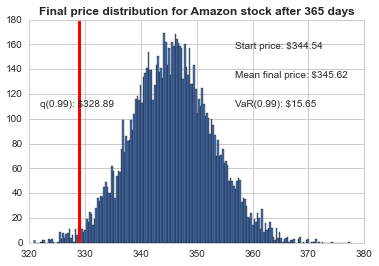

In [124]:
plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8, s = "Start price: $%.2f" %start_price)
plt.figtext(0.6,0.7, "Mean final price: $%.2f" %simulations.mean())
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q ,))
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=3, color = 'r')
plt.title(u"Final price distribution for Amazon stock after %s days" % days, weight = 'bold')